# 5 Graphs in Finance

## 5.1 

In [1]:
import numpy as np 
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt

df = pd.read_csv('snp_allstocks_2015_2019.csv')
df = df.set_index('Date')
info = pd.read_csv('snp_info.csv')
info.drop(columns = info.columns[0], inplace = True)

energy = info[info['GICS Sector'] == 'Energy']
tickers = ['APC', 'APA', 'COG', 'CXO', 'COP', 'FANG', 'EOG', 'MRO', 'NFX', 'NBL']

energy

,Security,Symbol,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
41,Anadarko Petroleum Corp,APC,reports,Energy,Oil & Gas Exploration & Production,"The Woodlands, Texas",1997-07-28,773910,1959
47,Apache Corporation,APA,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,6769,1954
63,"Baker Hughes, a GE Company",BHGE,reports,Energy,Oil & Gas Equipment & Services,"Houston, Texas",NaN,1701605,2017
86,Cabot Oil & Gas,COG,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",2008-06-23,858470,NaN
107,Chevron Corp.,CVX,reports,Energy,Integrated Oil & Gas,"San Ramon, California",NaN,93410,1879
112,Cimarex Energy,XEC,reports,Energy,Oil & Gas Exploration & Production,"Denver, Colorado",2014-06-21,1168054,NaN
128,Concho Resources,CXO,reports,Energy,Oil & Gas Exploration & Production,"Midland, Texas",2016-02-22,1358071,NaN
129,ConocoPhillips,COP,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",NaN,1163165,2002
148,Devon Energy Corp.,DVN,reports,Energy,Oil & Gas Exploration & Production,"Oklahoma City, Oklahoma",2000-08-30,1090012,NaN
149,Diamondback Energy Inc,FANG,reports,Energy,Oil & Gas Exploration & Production,"Midland, Texas",2018-12-03,1539838,2007


In [2]:
energy_exploration_production = energy[energy['GICS Sub Industry'] == 'Oil & Gas Exploration & Production']
energy_exploration_production = energy_exploration_production.set_index('Symbol')
energy_exploration_production
energy_exploration_production = energy_exploration_production.drop(['XEC', 'DVN', 'OXY', 'PXD'])
energy_exploration_production = energy_exploration_production.drop(['SEC filings', 'GICS Sector', 'GICS Sub Industry', 'CIK', 'Founded'], axis=1)
energy_exploration_production

# energy_exploration_production.to_csv('chosen_companies.csv')


,Security,Headquarters Location,Date first added[3][4]
Symbol,,,
APC,Anadarko Petroleum Corp,"The Woodlands, Texas",1997-07-28
APA,Apache Corporation,"Houston, Texas",1997-07-28
COG,Cabot Oil & Gas,"Houston, Texas",2008-06-23
CXO,Concho Resources,"Midland, Texas",2016-02-22
COP,ConocoPhillips,"Houston, Texas",NaN
FANG,Diamondback Energy Inc,"Midland, Texas",2018-12-03
EOG,EOG Resources,"Houston, Texas",2000-11-02
MRO,Marathon Oil Corp.,"Houston, Texas",1991-05-01
NFX,Newfield Exploration Co,"Houston, Texas",2010-12-20


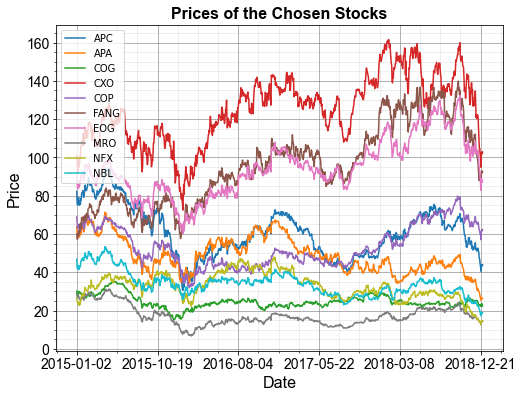

In [3]:
prices = df[tickers]
prices.plot()

plt.title('Prices of the Chosen Stocks', fontname="arial", fontsize=16, fontweight="bold")

plt.xlabel('Date', fontname="arial", fontsize=16)
plt.ylabel('Price', fontname="arial", fontsize=16)
plt.xticks(fontname="arial", fontsize=14)
plt.yticks(fontname="arial", fontsize=14)

plt.grid(which='major', linestyle='-', linewidth='0.5', color='#666666')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


fig = plt.gcf()
fig.set_size_inches(8, 6)

# plt.savefig('5_1_1a.pdf')


In [4]:
ri = np.log(df[tickers].dropna(1)).diff(1).dropna()
ri

,APC,APA,COG,CXO,COP,FANG,EOG,MRO,NFX,NBL
Date,,,,,,,,,,
2015-01-05,-0.082151,-0.063380,-0.056377,-0.049726,-0.048761,-0.045226,-0.062171,-0.047620,-0.066043,-0.100679
2015-01-06,-0.007415,-0.010909,-0.014160,-0.020286,-0.042162,0.001570,-0.028910,-0.015149,-0.012121,-0.011627
2015-01-07,0.015823,-0.011200,0.008520,-0.023528,0.006652,0.015223,-0.006314,0.012211,-0.041076,-0.003826
2015-01-08,0.031802,0.038006,0.019948,0.046826,0.024635,0.047604,0.037528,0.020026,0.015550,0.033917
2015-01-09,0.002910,-0.002962,0.040406,0.030847,-0.000154,0.012202,0.006654,-0.003250,0.021453,0.008991
...,...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.057008,-0.044281,-0.028910,-0.050845,-0.047779,-0.035546,-0.051740,-0.060532,-0.048348,-0.045603
2018-12-26,0.077746,0.062568,0.062534,0.077722,0.075811,0.071177,0.071372,0.112680,0.118127,0.094472
2018-12-27,0.002733,-0.011157,0.007601,0.002726,0.011800,0.009628,-0.002250,0.008433,-0.002755,-0.009479


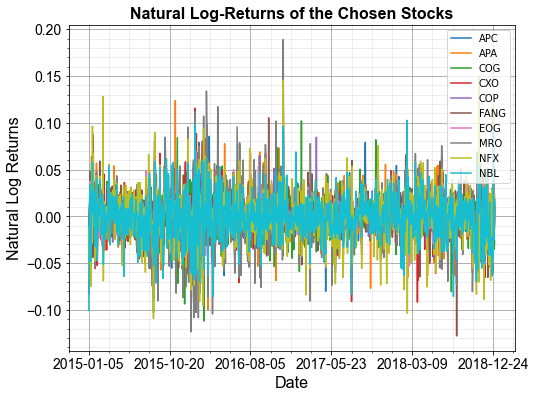

In [5]:
ri.plot()

plt.title('Natural Log-Returns of the Chosen Stocks', fontname="arial", fontsize=16, fontweight="bold")

plt.xlabel('Date', fontname="arial", fontsize=16)
plt.ylabel('Natural Log Returns', fontname="arial", fontsize=16)
plt.xticks(fontname="arial", fontsize=14)
plt.yticks(fontname="arial", fontsize=14)

plt.grid(which='major', linestyle='-', linewidth='0.5', color='#666666')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


fig = plt.gcf()
fig.set_size_inches(8, 6)
# plt.savefig('5_1_1b.pdf')



## 5.2

In [6]:
corr = ri.corr()
corr = corr.round(5)
# corr.to_csv('corr.csv')
corr

,APC,APA,COG,CXO,COP,FANG,EOG,MRO,NFX,NBL
APC,1.00000,0.70337,0.44246,0.69483,0.73922,0.63345,0.75636,0.76204,0.69567,0.74332
APA,0.70337,1.00000,0.48121,0.69441,0.70989,0.62540,0.74448,0.72969,0.65277,0.70962
COG,0.44246,0.48121,1.00000,0.45071,0.43973,0.44720,0.49218,0.46810,0.45239,0.45168
CXO,0.69483,0.69441,0.45071,1.00000,0.70027,0.76856,0.79999,0.68704,0.69897,0.70545
COP,0.73922,0.70989,0.43973,0.70027,1.00000,0.65477,0.77712,0.80030,0.68107,0.71172
FANG,0.63345,0.62540,0.44720,0.76856,0.65477,1.00000,0.74562,0.62761,0.68227,0.63554
EOG,0.75636,0.74448,0.49218,0.79999,0.77712,0.74562,1.00000,0.74374,0.71487,0.74901
MRO,0.76204,0.72969,0.46810,0.68704,0.80030,0.62761,0.74374,1.00000,0.68597,0.72016
NFX,0.69567,0.65277,0.45239,0.69897,0.68107,0.68227,0.71487,0.68597,1.00000,0.68366
NBL,0.74332,0.70962,0.45168,0.70545,0.71172,0.63554,0.74901,0.72016,0.68366,1.00000


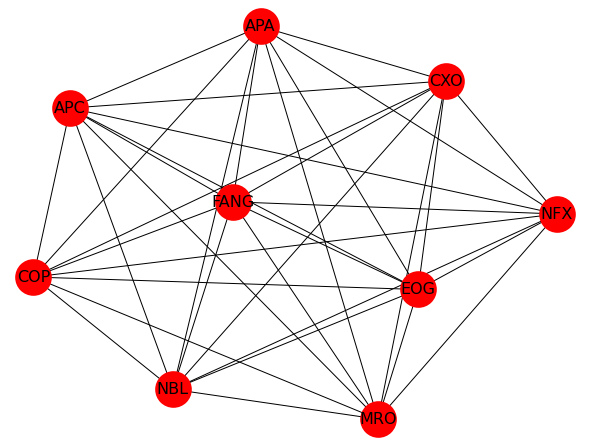

In [7]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
links_filtered=links.loc[ (links['value'] > 0.5) & (links['var1'] != links['var2']) ]
links_filtered
 
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 

nx.draw(G, with_labels=True, node_color='red', node_size=1000, edge_color='black', linewidths=5, font_size=16)
fig = plt.gcf()
fig.set_size_inches(8, 6)
# plt.savefig('5_2a.pdf')



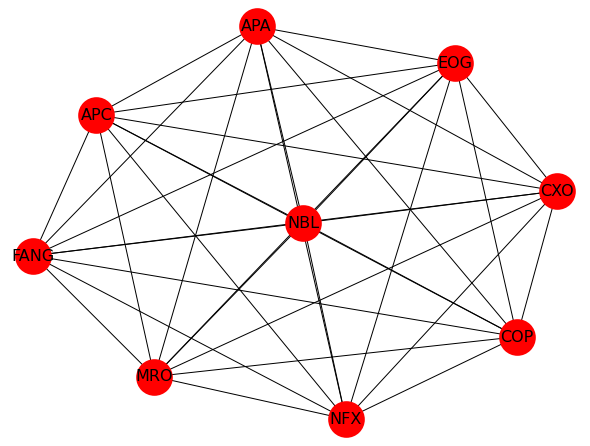

In [8]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
links_filtered=links.loc[ (links['value'] > 0.6) & (links['var1'] != links['var2']) ]
links_filtered
 
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 

nx.draw(G, with_labels=True, node_color='red', node_size=1000, edge_color='black', linewidths=5, font_size=16)
fig = plt.gcf()
fig.set_size_inches(8, 6)
# plt.savefig('5_2b.pdf')



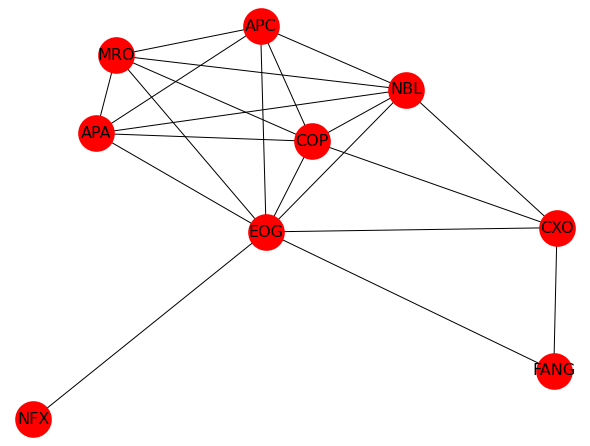

In [9]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
links_filtered=links.loc[ (links['value'] > 0.7) & (links['var1'] != links['var2']) ]
links_filtered
 
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 

nx.draw(G, with_labels=True, node_color='red', node_size=1000, edge_color='black', linewidths=5, font_size=16)
fig = plt.gcf()
fig.set_size_inches(8, 6)
# plt.savefig('5_2c.pdf')


## 5.3

In [10]:
df[tickers].head(10)


,APC,APA,COG,CXO,COP,FANG,EOG,MRO,NFX,NBL
Date,,,,,,,,,,
2015-01-02,82.290001,63.830002,30.100000,101.010002,68.919998,59.930000,92.239998,28.600000,26.600000,46.880001
2015-01-05,75.800003,59.910000,28.450001,96.110001,65.639999,57.279999,86.680000,27.270000,24.900000,42.389999
2015-01-06,75.239998,59.259998,28.049999,94.180000,62.930000,57.369999,84.209999,26.860001,24.600000,41.900002
2015-01-07,76.440002,58.599998,28.290001,91.989998,63.349998,58.250000,83.680000,27.190001,23.610001,41.740002
2015-01-08,78.910004,60.869999,28.860001,96.400002,64.930000,61.090000,86.879997,27.740000,23.980000,43.180000
2015-01-09,79.139999,60.689999,30.049999,99.419998,64.919998,61.840000,87.459999,27.650000,24.500000,43.570000
2015-01-12,75.050003,58.459999,29.360001,95.080002,63.070000,59.470001,84.510002,26.240000,22.730000,41.520000
2015-01-13,75.800003,58.459999,29.660000,96.980003,62.439999,61.240002,85.059998,25.889999,22.900000,42.540001
2015-01-14,77.349998,59.529999,29.510000,100.660004,62.619999,65.300003,87.739998,25.959999,24.190001,42.849998


In [11]:
df_shuffled = df[tickers].sample(frac = 1, axis  = 0)

# Shuffling the prices 

In [12]:
ri = np.log(df_shuffled).diff(1).dropna()
corr = ri.corr()
corr = corr.round(5)
# corr.to_csv('corr_price_shuffled.csv')
corr

,APC,APA,COG,CXO,COP,FANG,EOG,MRO,NFX,NBL
APC,1.00000,0.56029,0.47498,0.27635,0.67069,0.03242,0.41063,0.92394,0.30304,0.77020
APA,0.56029,1.00000,0.30587,0.02732,-0.00415,-0.24126,-0.02859,0.43878,0.74370,0.84503
COG,0.47498,0.30587,1.00000,0.29283,0.42445,0.06992,0.28773,0.59693,0.00002,0.34317
CXO,0.27635,0.02732,0.29283,1.00000,0.44416,0.90660,0.88012,0.32754,0.03534,-0.03371
COP,0.67069,-0.00415,0.42445,0.44416,1.00000,0.40281,0.72266,0.83655,-0.32640,0.23845
FANG,0.03242,-0.24126,0.06992,0.90660,0.40281,1.00000,0.87337,0.11672,-0.18882,-0.29004
EOG,0.41063,-0.02859,0.28773,0.88012,0.72266,0.87337,1.00000,0.51675,-0.18578,-0.00134
MRO,0.92394,0.43878,0.59693,0.32754,0.83655,0.11672,0.51675,1.00000,0.11810,0.64693
NFX,0.30304,0.74370,0.00002,0.03534,-0.32640,-0.18882,-0.18578,0.11810,1.00000,0.62176
NBL,0.77020,0.84503,0.34317,-0.03371,0.23845,-0.29004,-0.00134,0.64693,0.62176,1.00000


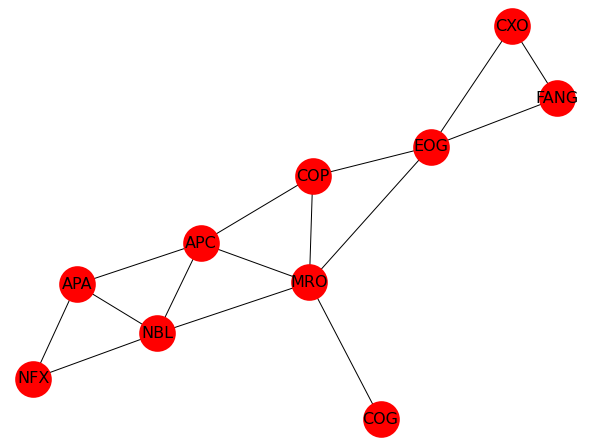

In [13]:

links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
links_filtered=links.loc[ (links['value'] > 0.5) & (links['var1'] != links['var2']) ]
links_filtered
 
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 

nx.draw(G, with_labels=True, node_color='red', node_size=1000, edge_color='black', linewidths=5, font_size=16)
fig = plt.gcf()
fig.set_size_inches(8, 6)
# plt.savefig('5_3a.pdf')



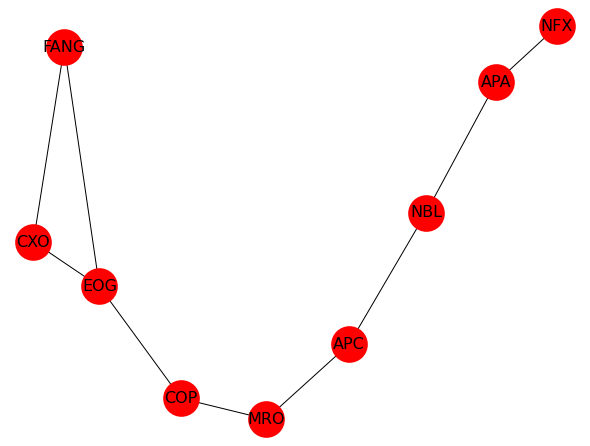

In [14]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
links_filtered=links.loc[ (links['value'] > 0.7) & (links['var1'] != links['var2']) ]
links_filtered
 
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 

nx.draw(G, with_labels=True, node_color='red', node_size=1000, edge_color='black', linewidths=5, font_size=16)
fig = plt.gcf()
fig.set_size_inches(8, 6)
# plt.savefig('5_3b.pdf')



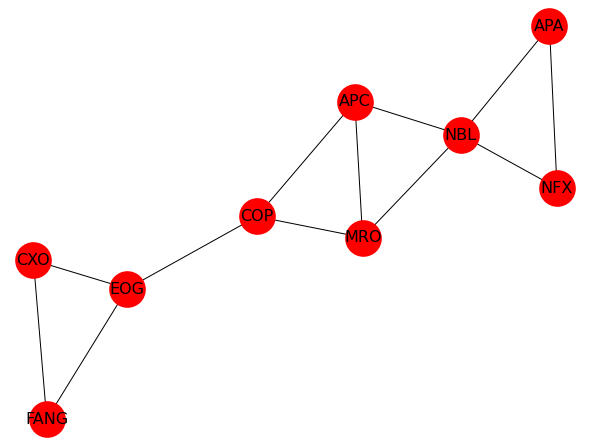

In [15]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
links_filtered=links.loc[ (links['value'] > 0.6) & (links['var1'] != links['var2']) ]
links_filtered
 
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 

nx.draw(G, with_labels=True, node_color='red', node_size=1000, edge_color='black', linewidths=5, font_size=16)
fig = plt.gcf()
fig.set_size_inches(8, 6)
# plt.savefig('5_3c.pdf')



In [16]:
ri = np.log(df[tickers].dropna(1)).diff(1).dropna()
corr = ri.sample(frac = 1, axis = 0).corr() 
corr

,APC,APA,COG,CXO,COP,FANG,EOG,MRO,NFX,NBL
APC,1.000000,0.703365,0.442461,0.694829,0.739221,0.633445,0.756362,0.762037,0.695674,0.743321
APA,0.703365,1.000000,0.481213,0.694407,0.709889,0.625403,0.744480,0.729692,0.652773,0.709624
COG,0.442461,0.481213,1.000000,0.450708,0.439725,0.447197,0.492177,0.468102,0.452391,0.451680
CXO,0.694829,0.694407,0.450708,1.000000,0.700274,0.768564,0.799991,0.687043,0.698965,0.705450
COP,0.739221,0.709889,0.439725,0.700274,1.000000,0.654767,0.777119,0.800299,0.681072,0.711720
FANG,0.633445,0.625403,0.447197,0.768564,0.654767,1.000000,0.745617,0.627606,0.682269,0.635538
EOG,0.756362,0.744480,0.492177,0.799991,0.777119,0.745617,1.000000,0.743742,0.714872,0.749014
MRO,0.762037,0.729692,0.468102,0.687043,0.800299,0.627606,0.743742,1.000000,0.685972,0.720160
NFX,0.695674,0.652773,0.452391,0.698965,0.681072,0.682269,0.714872,0.685972,1.000000,0.683656
NBL,0.743321,0.709624,0.451680,0.705450,0.711720,0.635538,0.749014,0.720160,0.683656,1.000000


In [17]:
corr = corr.round(5)
# corr.to_csv('corr_returns_shuffled.csv')
corr

,APC,APA,COG,CXO,COP,FANG,EOG,MRO,NFX,NBL
APC,1.00000,0.70337,0.44246,0.69483,0.73922,0.63345,0.75636,0.76204,0.69567,0.74332
APA,0.70337,1.00000,0.48121,0.69441,0.70989,0.62540,0.74448,0.72969,0.65277,0.70962
COG,0.44246,0.48121,1.00000,0.45071,0.43973,0.44720,0.49218,0.46810,0.45239,0.45168
CXO,0.69483,0.69441,0.45071,1.00000,0.70027,0.76856,0.79999,0.68704,0.69897,0.70545
COP,0.73922,0.70989,0.43973,0.70027,1.00000,0.65477,0.77712,0.80030,0.68107,0.71172
FANG,0.63345,0.62540,0.44720,0.76856,0.65477,1.00000,0.74562,0.62761,0.68227,0.63554
EOG,0.75636,0.74448,0.49218,0.79999,0.77712,0.74562,1.00000,0.74374,0.71487,0.74901
MRO,0.76204,0.72969,0.46810,0.68704,0.80030,0.62761,0.74374,1.00000,0.68597,0.72016
NFX,0.69567,0.65277,0.45239,0.69897,0.68107,0.68227,0.71487,0.68597,1.00000,0.68366
NBL,0.74332,0.70962,0.45168,0.70545,0.71172,0.63554,0.74901,0.72016,0.68366,1.00000


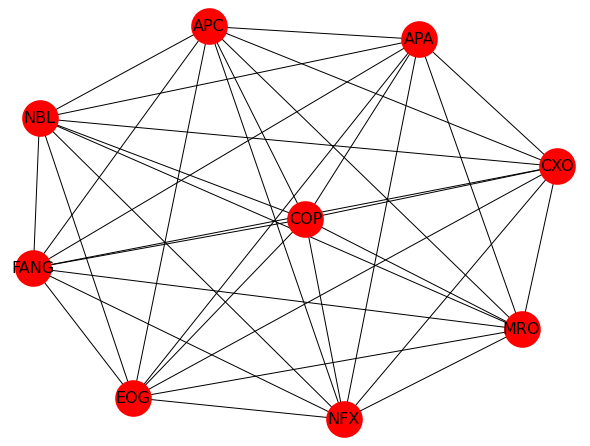

In [18]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
links_filtered=links.loc[ (links['value'] > 0.5) & (links['var1'] != links['var2']) ]
links_filtered
 
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 

nx.draw(G, with_labels=True, node_color='red', node_size=1000, edge_color='black', linewidths=5, font_size=16)
fig = plt.gcf()
fig.set_size_inches(8, 6)
# plt.savefig('5_3d.pdf')

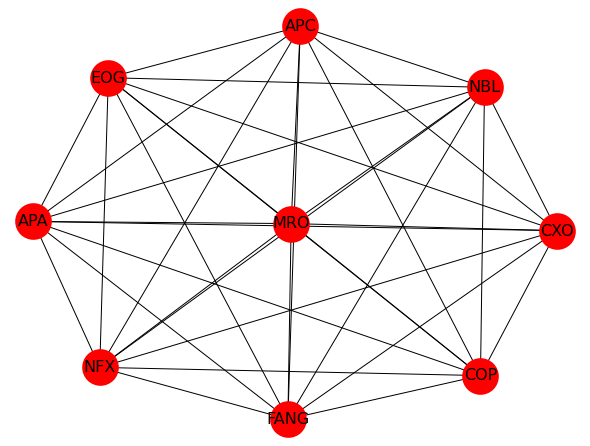

In [19]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
links_filtered=links.loc[ (links['value'] > 0.6) & (links['var1'] != links['var2']) ]
links_filtered
 
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 

nx.draw(G, with_labels=True, node_color='red', node_size=1000, edge_color='black', linewidths=5, font_size=16)
fig = plt.gcf()
fig.set_size_inches(8, 6)
# plt.savefig('5_3e.pdf')

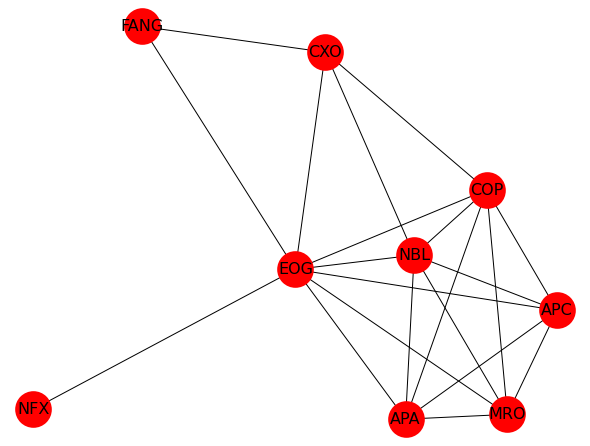

In [20]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
links_filtered=links.loc[ (links['value'] > 0.7) & (links['var1'] != links['var2']) ]
links_filtered
 
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 

nx.draw(G, with_labels=True, node_color='red', node_size=1000, edge_color='black', linewidths=5, font_size=16)
fig = plt.gcf()
fig.set_size_inches(8, 6)
# plt.savefig('5_3f.pdf')

## 5.4

In [21]:
import numpy as np 
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt

df = pd.read_csv('snp_allstocks_2015_2019.csv')
df = df.set_index('Date')
info = pd.read_csv('snp_info.csv')
info.drop(columns = info.columns[0], inplace = True)

energy = info[info['GICS Sector'] == 'Energy']
tickers = ['APC', 'APA', 'COG', 'CXO', 'COP', 'FANG', 'EOG', 'MRO', 'NFX', 'NBL']

ri = np.log(df[tickers].dropna(1)).diff(1).dropna()
ri

,APC,APA,COG,CXO,COP,FANG,EOG,MRO,NFX,NBL
Date,,,,,,,,,,
2015-01-05,-0.082151,-0.063380,-0.056377,-0.049726,-0.048761,-0.045226,-0.062171,-0.047620,-0.066043,-0.100679
2015-01-06,-0.007415,-0.010909,-0.014160,-0.020286,-0.042162,0.001570,-0.028910,-0.015149,-0.012121,-0.011627
2015-01-07,0.015823,-0.011200,0.008520,-0.023528,0.006652,0.015223,-0.006314,0.012211,-0.041076,-0.003826
2015-01-08,0.031802,0.038006,0.019948,0.046826,0.024635,0.047604,0.037528,0.020026,0.015550,0.033917
2015-01-09,0.002910,-0.002962,0.040406,0.030847,-0.000154,0.012202,0.006654,-0.003250,0.021453,0.008991
...,...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.057008,-0.044281,-0.028910,-0.050845,-0.047779,-0.035546,-0.051740,-0.060532,-0.048348,-0.045603
2018-12-26,0.077746,0.062568,0.062534,0.077722,0.075811,0.071177,0.071372,0.112680,0.118127,0.094472
2018-12-27,0.002733,-0.011157,0.007601,0.002726,0.011800,0.009628,-0.002250,0.008433,-0.002755,-0.009479


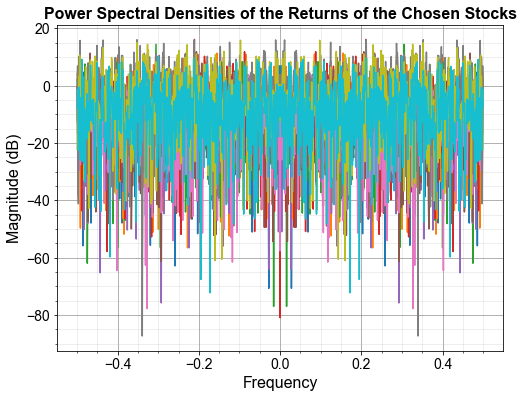

In [22]:
from scipy import signal

PSSlog = pd.DataFrame(index = ri.index, columns = ri.columns)
PSS = pd.DataFrame(index = ri.index, columns = ri.columns)

for ticker in ri.columns:
    PSSlog[ticker] = 10*np.log(np.abs(np.fft.fft(ri[ticker])) ** 2)
    PSS[ticker] = np.abs(np.fft.fft(ri[ticker])) ** 2

for ticker in ri.columns:
    time_step = 1
    freqs = np.fft.fftfreq(len(ri[ticker]), time_step)
    idx = np.argsort(freqs)
    plt.plot(freqs[idx], PSSlog[ticker][idx])
    
plt.title('Power Spectral Densities of the Returns of the Chosen Stocks', fontname="arial", fontsize=16, fontweight="bold")

plt.xlabel('Frequency', fontname="arial", fontsize=16)
plt.ylabel('Magnitude (dB)', fontname="arial", fontsize=16)
plt.xticks(fontname="arial", fontsize=14)
plt.yticks(fontname="arial", fontsize=14)

plt.grid(which='major', linestyle='-', linewidth='0.5', color='#666666')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


fig = plt.gcf()
fig.set_size_inches(8, 6)

In [23]:
PSS.corr()

,APC,APA,COG,CXO,COP,FANG,EOG,MRO,NFX,NBL
APC,1.000000,0.494653,0.197224,0.362122,0.500475,0.324129,0.535499,0.531920,0.431089,0.538302
APA,0.494653,1.000000,0.175195,0.473666,0.504525,0.376510,0.549938,0.452134,0.401551,0.507022
COG,0.197224,0.175195,1.000000,0.171224,0.169159,0.182821,0.236574,0.230948,0.171920,0.214165
CXO,0.362122,0.473666,0.171224,1.000000,0.420193,0.546178,0.621574,0.457196,0.429847,0.445304
COP,0.500475,0.504525,0.169159,0.420193,1.000000,0.368420,0.558298,0.620895,0.452009,0.503464
FANG,0.324129,0.376510,0.182821,0.546178,0.368420,1.000000,0.541755,0.355788,0.425213,0.419716
EOG,0.535499,0.549938,0.236574,0.621574,0.558298,0.541755,1.000000,0.512744,0.463281,0.529907
MRO,0.531920,0.452134,0.230948,0.457196,0.620895,0.355788,0.512744,1.000000,0.478176,0.521415
NFX,0.431089,0.401551,0.171920,0.429847,0.452009,0.425213,0.463281,0.478176,1.000000,0.432449
NBL,0.538302,0.507022,0.214165,0.445304,0.503464,0.419716,0.529907,0.521415,0.432449,1.000000


In [24]:
from scipy import signal 
f, Cxy = signal.coherence(ri['APC'], ri['APA'], 1)

In [25]:
from dtaidistance import dtw
import numpy as np
timeseries = np.array([
    ri['APC'],
    ri['APA'],
    ri['COG'], 
    ri['CXO'], 
    ri['COP'], 
    ri['FANG'], 
    ri['EOG'],
    ri['MRO'], 
    ri['NFX'],
    ri['NBL']])
ds = dtw.distance_matrix_fast(timeseries)
ds

DTAIDistance C-extension for Numpy is not available. Proceeding anyway.


array([[0.        , 0.45878433, 0.49552299, 0.4568497 , 0.41754656,
        0.47746831, 0.40558968, 0.52151598, 0.52935318, 0.43032268],
       [0.45878433, 0.        , 0.5193172 , 0.48085532, 0.46501231,
        0.49731485, 0.44583512, 0.56419037, 0.557076  , 0.47854596],
       [0.49552299, 0.5193172 , 0.        , 0.50391262, 0.4621166 ,
        0.51104563, 0.4676738 , 0.62064245, 0.60237091, 0.50990551],
       [0.4568497 , 0.48085532, 0.50391262, 0.        , 0.4458876 ,
        0.4391939 , 0.39133856, 0.58000041, 0.53745469, 0.44903869],
       [0.41754656, 0.46501231, 0.4621166 , 0.4458876 , 0.        ,
        0.45953883, 0.36068021, 0.52654125, 0.54651375, 0.42758393],
       [0.47746831, 0.49731485, 0.51104563, 0.4391939 , 0.45953883,
        0.        , 0.41248962, 0.60286614, 0.5386463 , 0.47471579],
       [0.40558968, 0.44583512, 0.4676738 , 0.39133856, 0.36068021,
        0.41248962, 0.        , 0.58558599, 0.53915144, 0.40692865],
       [0.52151598, 0.56419037, 0.6206424

In [26]:
ds

array([[0.        , 0.45878433, 0.49552299, 0.4568497 , 0.41754656,
        0.47746831, 0.40558968, 0.52151598, 0.52935318, 0.43032268],
       [0.45878433, 0.        , 0.5193172 , 0.48085532, 0.46501231,
        0.49731485, 0.44583512, 0.56419037, 0.557076  , 0.47854596],
       [0.49552299, 0.5193172 , 0.        , 0.50391262, 0.4621166 ,
        0.51104563, 0.4676738 , 0.62064245, 0.60237091, 0.50990551],
       [0.4568497 , 0.48085532, 0.50391262, 0.        , 0.4458876 ,
        0.4391939 , 0.39133856, 0.58000041, 0.53745469, 0.44903869],
       [0.41754656, 0.46501231, 0.4621166 , 0.4458876 , 0.        ,
        0.45953883, 0.36068021, 0.52654125, 0.54651375, 0.42758393],
       [0.47746831, 0.49731485, 0.51104563, 0.4391939 , 0.45953883,
        0.        , 0.41248962, 0.60286614, 0.5386463 , 0.47471579],
       [0.40558968, 0.44583512, 0.4676738 , 0.39133856, 0.36068021,
        0.41248962, 0.        , 0.58558599, 0.53915144, 0.40692865],
       [0.52151598, 0.56419037, 0.6206424

In [27]:
tickers = ['APC', 'APA', 'COG', 'CXO', 'COP', 'FANG', 'EOG', 'MRO', 'NFX', 'NBL']
dtw = pd.DataFrame(ds, columns = tickers)
dtw.index = tickers
dtw

,APC,APA,COG,CXO,COP,FANG,EOG,MRO,NFX,NBL
APC,0.000000,0.458784,0.495523,0.456850,0.417547,0.477468,0.405590,0.521516,0.529353,0.430323
APA,0.458784,0.000000,0.519317,0.480855,0.465012,0.497315,0.445835,0.564190,0.557076,0.478546
COG,0.495523,0.519317,0.000000,0.503913,0.462117,0.511046,0.467674,0.620642,0.602371,0.509906
CXO,0.456850,0.480855,0.503913,0.000000,0.445888,0.439194,0.391339,0.580000,0.537455,0.449039
COP,0.417547,0.465012,0.462117,0.445888,0.000000,0.459539,0.360680,0.526541,0.546514,0.427584
FANG,0.477468,0.497315,0.511046,0.439194,0.459539,0.000000,0.412490,0.602866,0.538646,0.474716
EOG,0.405590,0.445835,0.467674,0.391339,0.360680,0.412490,0.000000,0.585586,0.539151,0.406929
MRO,0.521516,0.564190,0.620642,0.580000,0.526541,0.602866,0.585586,0.000000,0.611500,0.553129
NFX,0.529353,0.557076,0.602371,0.537455,0.546514,0.538646,0.539151,0.611500,0.000000,0.528999
NBL,0.430323,0.478546,0.509906,0.449039,0.427584,0.474716,0.406929,0.553129,0.528999,0.000000


In [28]:
dtw_final = dtw.round(5)
dtw_final.to_csv('dtw.csv')

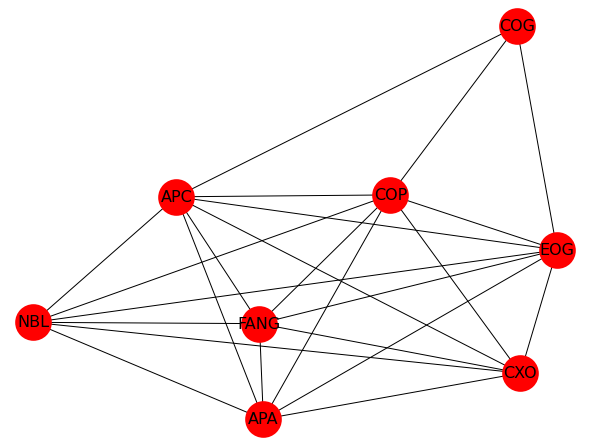

In [29]:
links = dtw_final.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
links_filtered=links.loc[ (links['value'] < 0.5) & (links['var1'] != links['var2']) ]
links_filtered
 
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 

nx.draw(G, with_labels=True, node_color='red', node_size=1000, edge_color='black', linewidths=5, font_size=16)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.savefig('5_4a.pdf')

DTAIDistance C-extension for Numpy is not available. Proceeding anyway.


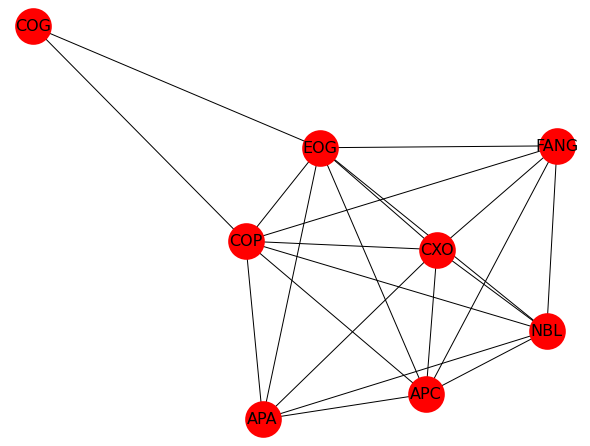

In [30]:
import numpy as np 
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt

df = pd.read_csv('snp_allstocks_2015_2019.csv')
df = df.set_index('Date')
info = pd.read_csv('snp_info.csv')
info.drop(columns = info.columns[0], inplace = True)

energy = info[info['GICS Sector'] == 'Energy']
tickers = ['APC', 'APA', 'COG', 'CXO', 'COP', 'FANG', 'EOG', 'MRO', 'NFX', 'NBL']

ri = np.log(df[tickers].dropna(1)).diff(1).dropna()
ri_shuffled = ri.sample(frac = 1, axis = 0)

from dtaidistance import dtw
import numpy as np
timeseries = np.array([
    ri_shuffled['APC'],
    ri_shuffled['APA'],
    ri_shuffled['COG'], 
    ri_shuffled['CXO'], 
    ri_shuffled['COP'], 
    ri_shuffled['FANG'], 
    ri_shuffled['EOG'],
    ri_shuffled['MRO'], 
    ri_shuffled['NFX'],
    ri_shuffled['NBL']])
ds = dtw.distance_matrix_fast(timeseries)
tickers = ['APC', 'APA', 'COG', 'CXO', 'COP', 'FANG', 'EOG', 'MRO', 'NFX', 'NBL']
dtw = pd.DataFrame(ds, columns = tickers)
dtw.index = tickers
dtw_final = dtw.round(5)
dtw_final
# dtw_final.to_csv('dtwshuffled.csv')
links = dtw_final.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
links_filtered=links.loc[ (links['value'] < 0.5) & (links['var1'] != links['var2']) ]
links_filtered
 
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 

nx.draw(G, with_labels=True, node_color='red', node_size=1000, edge_color='black', linewidths=5, font_size=16)
fig = plt.gcf()
fig.set_size_inches(8, 6)
# plt.savefig('5_4b.pdf')

## 5.5

In [31]:
import numpy as np 
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt

df = pd.read_csv('snp_allstocks_2015_2019.csv')
df = df.set_index('Date')
info = pd.read_csv('snp_info.csv')
info.drop(columns = info.columns[0], inplace = True)

energy = info[info['GICS Sector'] == 'Energy']
tickers = ['APC', 'APA', 'COG', 'CXO', 'COP', 'FANG', 'EOG', 'MRO', 'NFX', 'NBL']

In [32]:
prices = (df[tickers].dropna(1))


In [33]:
pricecorr = (prices).corr()
pricecorr = pricecorr.round(5)
# pricecorr.to_csv('pricecorr.csv')
pricecorr

,APC,APA,COG,CXO,COP,FANG,EOG,MRO,NFX,NBL
APC,1.00000,0.58023,0.52077,0.16630,0.64164,-0.02836,0.32063,0.92658,0.27483,0.81258
APA,0.58023,1.00000,0.37420,-0.01628,-0.01321,-0.28715,-0.07505,0.48564,0.72480,0.83699
COG,0.52077,0.37420,1.00000,0.17332,0.36722,-0.04388,0.15192,0.64009,0.06566,0.44832
CXO,0.16630,-0.01628,0.17332,1.00000,0.41045,0.90620,0.86394,0.17003,0.02710,-0.09902
COP,0.64164,-0.01321,0.36722,0.41045,1.00000,0.43414,0.71488,0.78638,-0.35520,0.26159
FANG,-0.02836,-0.28715,-0.04388,0.90620,0.43414,1.00000,0.89389,0.01113,-0.21371,-0.32849
EOG,0.32063,-0.07505,0.15192,0.86394,0.71488,0.89389,1.00000,0.38299,-0.20192,-0.04678
MRO,0.92658,0.48564,0.64009,0.17003,0.78638,0.01113,0.38299,1.00000,0.08773,0.73748
NFX,0.27483,0.72480,0.06566,0.02710,-0.35520,-0.21371,-0.20192,0.08773,1.00000,0.54710
NBL,0.81258,0.83699,0.44832,-0.09902,0.26159,-0.32849,-0.04678,0.73748,0.54710,1.00000


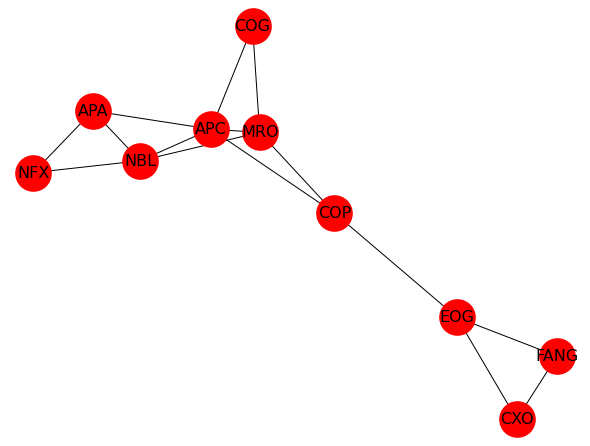

In [34]:
links = pricecorr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
links_filtered=links.loc[ (links['value'] > 0.5) & (links['var1'] != links['var2']) ]
links_filtered
 
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 

nx.draw(G, with_labels=True, node_color='red', node_size=1000, edge_color='black', linewidths=5, font_size=16)
fig = plt.gcf()
fig.set_size_inches(8, 6)
# plt.savefig('5_5random.pdf')

In [35]:
df_shuffled = df[tickers].sample(frac = 1, axis  = 0)


prices = (df_shuffled[tickers].dropna(1))
prices.corr()

,APC,APA,COG,CXO,COP,FANG,EOG,MRO,NFX,NBL
APC,1.000000,0.580230,0.520767,0.166299,0.641643,-0.028363,0.320629,0.926583,0.274829,0.812583
APA,0.580230,1.000000,0.374200,-0.016277,-0.013208,-0.287149,-0.075045,0.485643,0.724802,0.836986
COG,0.520767,0.374200,1.000000,0.173318,0.367216,-0.043876,0.151920,0.640085,0.065655,0.448317
CXO,0.166299,-0.016277,0.173318,1.000000,0.410453,0.906199,0.863937,0.170033,0.027100,-0.099020
COP,0.641643,-0.013208,0.367216,0.410453,1.000000,0.434139,0.714878,0.786379,-0.355196,0.261587
FANG,-0.028363,-0.287149,-0.043876,0.906199,0.434139,1.000000,0.893890,0.011129,-0.213709,-0.328492
EOG,0.320629,-0.075045,0.151920,0.863937,0.714878,0.893890,1.000000,0.382994,-0.201920,-0.046782
MRO,0.926583,0.485643,0.640085,0.170033,0.786379,0.011129,0.382994,1.000000,0.087733,0.737480
NFX,0.274829,0.724802,0.065655,0.027100,-0.355196,-0.213709,-0.201920,0.087733,1.000000,0.547105
NBL,0.812583,0.836986,0.448317,-0.099020,0.261587,-0.328492,-0.046782,0.737480,0.547105,1.000000
